In [27]:
from architecture import pipe
from PIL import Image
from dataloader import testing_dataset
from util import util
from torch.utils.data import DataLoader
from vit_pytorch import SimpleViT
import torch
from torch.nn import BCELoss

In [28]:
'hello'

'hello'

In [29]:
state = torch.load('./saves/exp_1/model_epoch_27.pth')

In [30]:
vision_model = SimpleViT(
    image_size=(384, 256),
    patch_size=32,
    num_classes=14,
    dim=512,
    depth=6,
    heads=16,
    mlp_dim=1024
)
vision_model.load_state_dict(state['model_state_dict'])

<All keys matched successfully>

In [31]:
dataset = DataLoader(testing_dataset, shuffle=True)

In [45]:
dataset.__getitem__(5)

AttributeError: 'DataLoader' object has no attribute '__getitem__'

In [46]:
sample = next(iter(dataset))

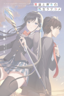

In [47]:
util.to_pil(sample[0][0]).resize((64, 96))

In [48]:
print(sample[1])
util.to_classes(sample[1])

tensor([[0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.]])


(['school life', 'shounen', 'harem', 'comedy', 'romance', 'fantasy'],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [49]:
res = vision_model(sample[0]).sigmoid()
res

tensor([[0.0455, 0.2469, 0.1694, 0.0866, 0.2525, 0.0903, 0.1128, 0.3644, 0.6201,
         0.7247, 0.3193, 0.2967, 0.3684, 0.9027]], grad_fn=<SigmoidBackward0>)

In [50]:
util.pick_top(res[0], 6, prettify=True)

(['fantasy', 'action', 'adventure', 'romance', 'harem', 'drama'],
 [0.9027473330497742,
  0.724653422832489,
  0.6201335787773132,
  0.36842477321624756,
  0.3643774688243866,
  0.3192892372608185])

In [51]:
util.calculate_precession(res, sample[1], cutoff=.45)

tensor([-0.1667])